In [6]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
df_prices = pd.read_csv(r'C:\Users\Rahul\Downloads\NIFTY.csv')
print(df_prices.head())
print(df_prices.size)

         Date         Open         High          Low        Close  \
0  2020-03-23  7945.700195  8159.250000  7583.600098  7610.250000   
1  2020-03-24  7848.299805  8036.950195  7511.100098  7801.049805   
2  2020-03-25  7735.149902  8376.750000  7714.750000  8317.849609   
3  2020-03-26  8451.000000  8749.049805  8304.900391  8641.450195   
4  2020-03-27  8949.099609  9038.900391  8522.900391  8660.250000   

     Adj Close    Volume  
0  7610.250000  653500.0  
1  7801.049805  738400.0  
2  8317.849609  736900.0  
3  8641.450195  865600.0  
4  8660.250000  801500.0  
1743


In [8]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   Open       247 non-null    float64       
 2   High       247 non-null    float64       
 3   Low        247 non-null    float64       
 4   Close      247 non-null    float64       
 5   Adj Close  247 non-null    float64       
 6   Volume     247 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.7 KB


In [9]:
df_prices.dropna(inplace = True)
df_prices.isnull().sum().sum()

0

Text(0, 0.5, 'Open')

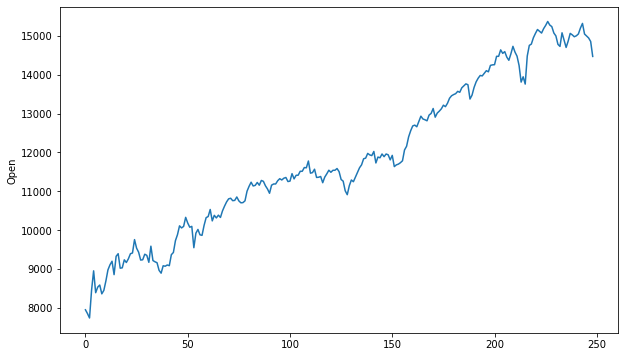

In [10]:
plt.figure(figsize=(10, 6))
df_prices['Open'].plot()
plt.ylabel('Open')

Text(0, 0.5, 'Close')

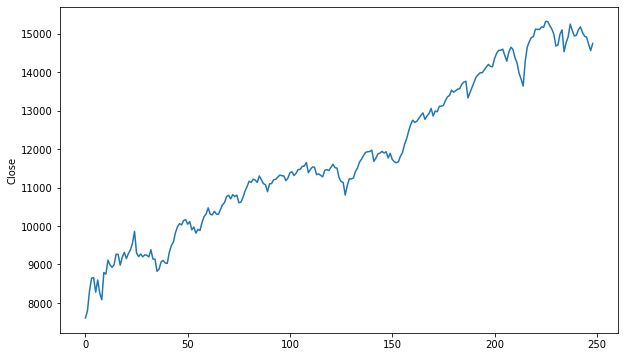

In [11]:
plt.figure(figsize=(10, 6))
df_prices['Close'].plot()
plt.ylabel('Close')

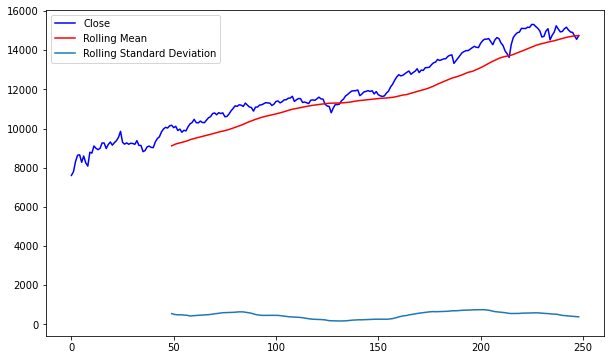

In [12]:
close = df_prices['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

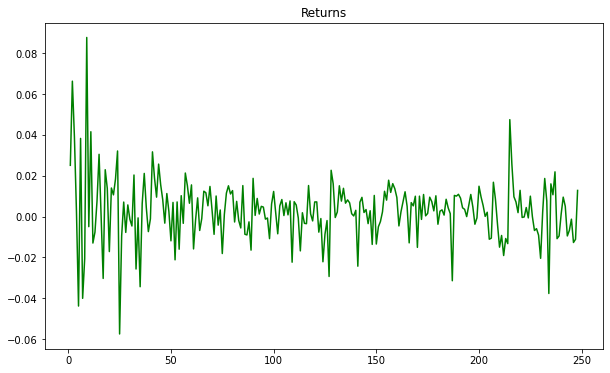

In [13]:
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [14]:
train = df_prices[:4000]
test = df_prices[4000:]

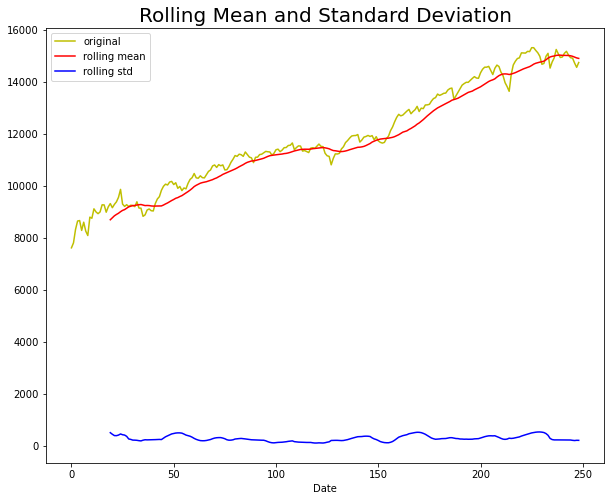

Results of dickey fuller test
ADF Test Statistic : -1.54856444157898
p-value : 0.5093651966726037
#Lags Used : 0
Number of Observations Used : 246
Weak evidence against null hypothesis, time series is non-stationary 


In [15]:
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

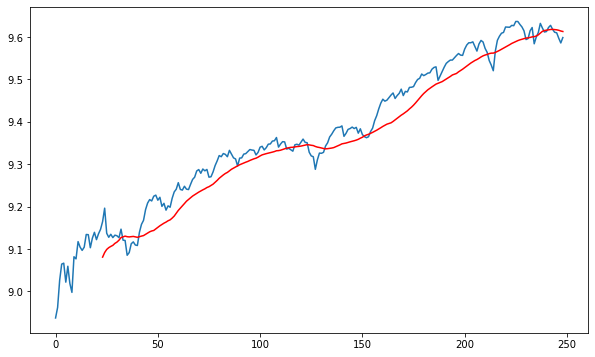

In [16]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [18]:
train = df_prices[200:220]
test = df_prices[220:]
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
202,2021-01-12,14473.799805,14590.650391,14432.849609,14563.450195,14563.450195,929600.0
203,2021-01-13,14639.799805,14653.349609,14435.700195,14564.849609,14564.849609,874000.0
204,2021-01-14,14550.049805,14617.799805,14471.500000,14595.599609,14595.599609,620200.0
205,2021-01-15,14594.349609,14617.450195,14357.849609,14433.700195,14433.700195,789600.0
206,2021-01-18,14453.299805,14459.150391,14222.799805,14281.299805,14281.299805,762000.0


In [19]:
train_open= train.iloc[:, 1:2].values

In [20]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [21]:
train_open_scaled[2]

array([0.56308901])

In [22]:
xtrain=[]
ytrain=[]
for i in range(2,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-2:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)


In [23]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [24]:
xtrain.shape

(18, 2, 1)

In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))
#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 0.3624
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.3556
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.3490
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.3427
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3347
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.3284
Epoch 7/100
1/1 [==============================] - 0s 993us/step - loss: 0.3199
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.3118
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3038
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2959
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2851
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 0.2782
Epoch 13/100
1/1 [==============================] - 0s 0s/step - l

In [27]:
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-2:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [28]:
xtest= []
for i in range(2,10):
    xtest.append(test_input[i-2:i,0]) #creating input for lstm prediction

In [29]:
xtest= np.array(xtest)

In [30]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

In [31]:
predicted_value= ss.inverse_transform(predicted_value)

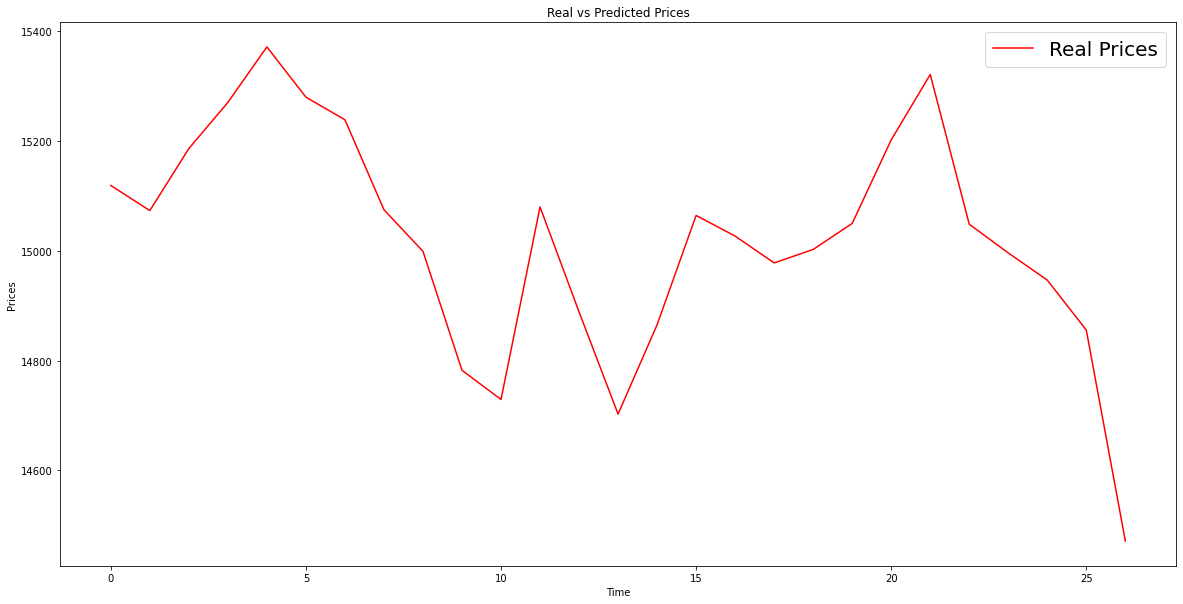

In [32]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
#plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

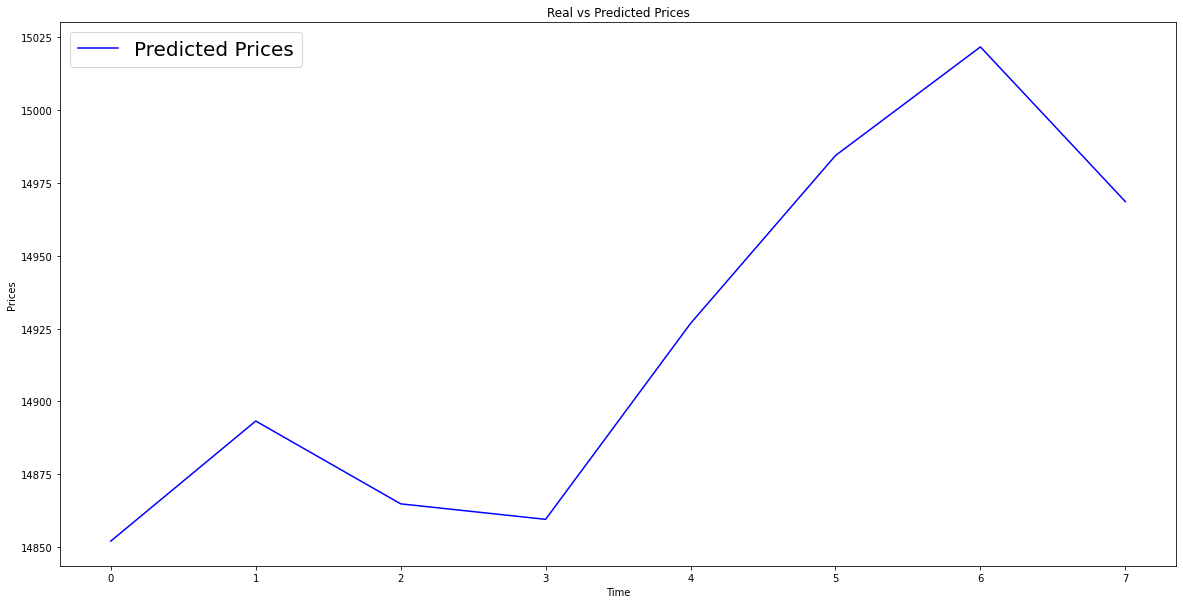

In [33]:
plt.figure(figsize=(20,10))
#plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [34]:
from keras.wrappers.scikit_learn import KerasRegressor

In [35]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3871
Epoch 2/50
1/1 [==============================] - 0s 998us/step - loss: 0.3799
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3725
Epoch 4/50
1/1 [==============================] - 0s 0s/step - loss: 0.3656
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3583
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3502
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 0.3414
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3341
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3156
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3077
Epoch 12/50
1/1 [==============================] - 0s 1ms/step - loss: 0.2969
Epoch 13/50
1/1 [==============================] - 0s 997us/step - loss:

In [37]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3627
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 0.3565
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 0.3508
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3446
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 0.3388
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3318
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3188
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3124
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2871
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 0.

In [38]:
model

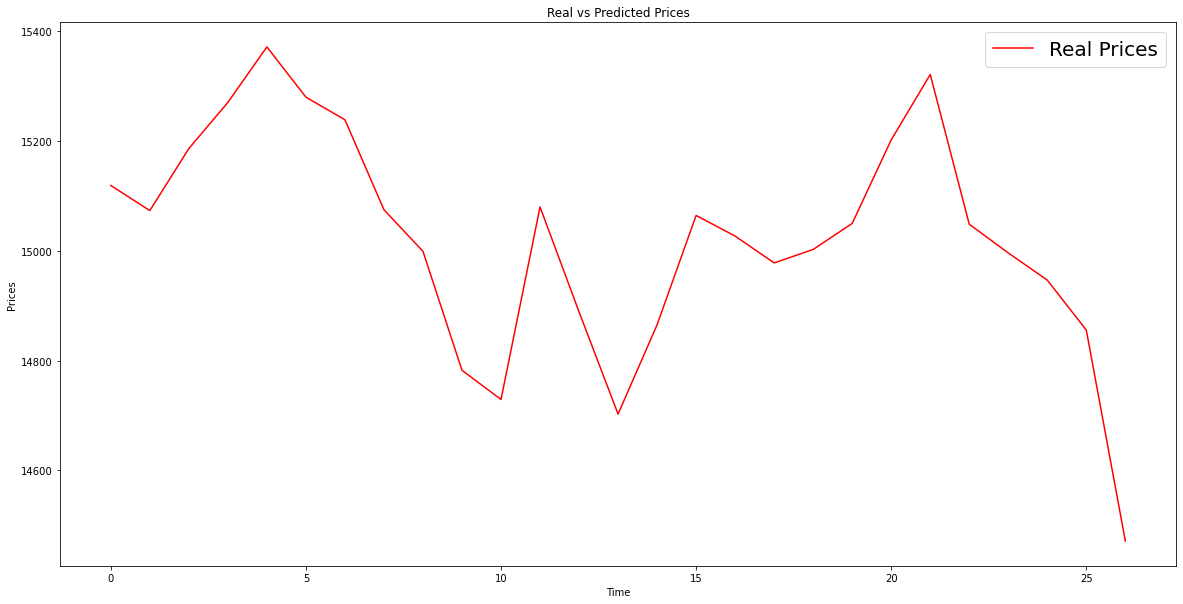

In [39]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
#plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

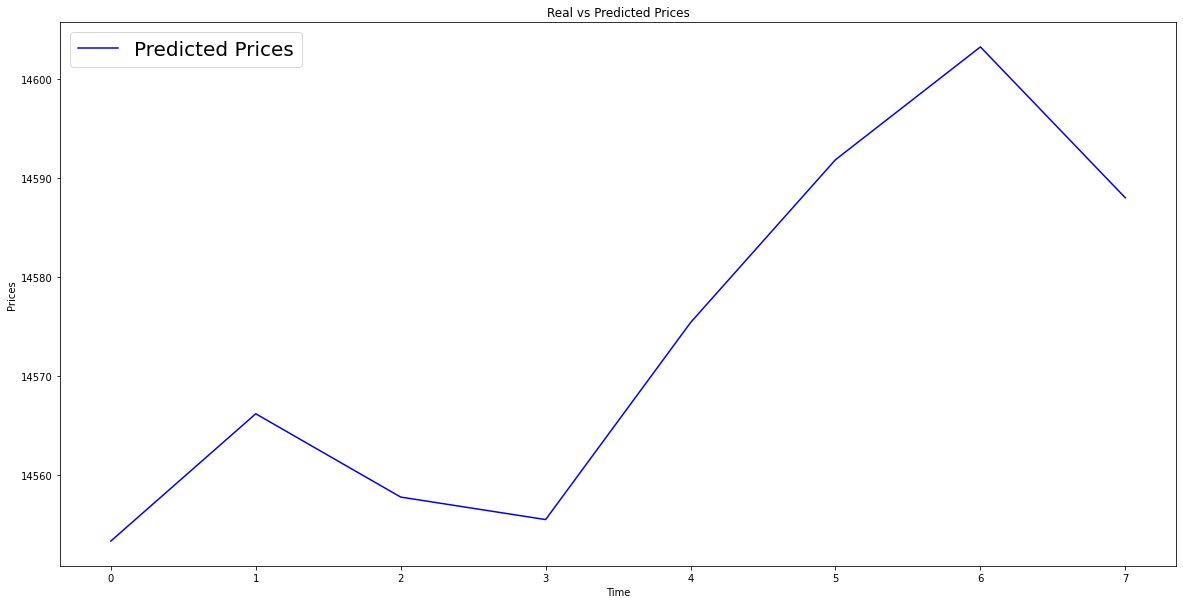

In [40]:
plt.figure(figsize=(20,10))
#plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [41]:
cols = ['Date','Category','News']
df_news = pd.read_csv(r'C:\Users\Rahul\Downloads\india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


In [42]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [43]:
#Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,2020-12-31,Govt extends deadline for use of FASTag till F...


In [44]:
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [45]:
df_news['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7257    #BigInterview! Dhritiman Chatterjee: Nobody da...
7258    Horoscope Today; 28 December 2020: Check astro...
7259    Man recovers charred remains of 'thief' from h...
7260    Numerology Readings 30 December 2020: Predicti...
7261    Horoscope Today; 31 December 2020: Check astro...
Name: News, Length: 7262, dtype: object

In [46]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [47]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


<AxesSubplot:>

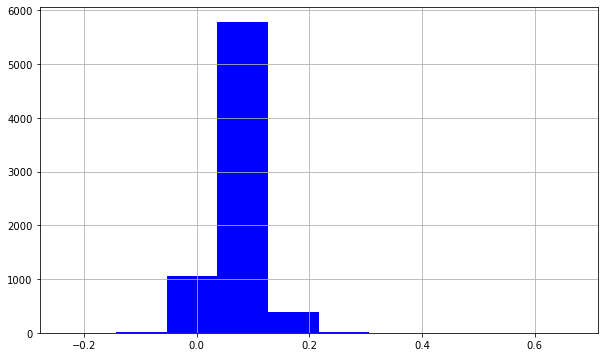

In [48]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'blue')

<AxesSubplot:>

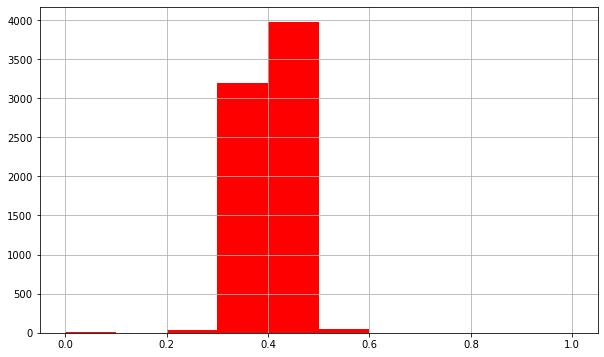

In [49]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'red')

In [50]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [51]:
df_merge = pd.merge(df_prices, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-03-23,7945.700195,8159.250000,7583.600098,7610.250000,7610.250000,653500.0,This Lesbian Swiss fashion boutique owner wore...,0.396173,0.084796,-0.9998,0.146,0.760,0.093
1,2020-03-24,7848.299805,8036.950195,7511.100098,7801.049805,7801.049805,738400.0,GMCH; Mayo conduct mock drills to handle spike...,0.381253,0.037725,-0.9999,0.138,0.794,0.068
2,2020-03-25,7735.149902,8376.750000,7714.750000,8317.849609,8317.849609,736900.0,Lockdown Day 1: Many come out Daily wagers on ...,0.391445,0.075517,-0.9996,0.138,0.759,0.103
3,2020-03-26,8451.000000,8749.049805,8304.900391,8641.450195,8641.450195,865600.0,Details of face mask manufactures sought by Go...,0.388337,0.073784,-0.9996,0.119,0.807,0.073
4,2020-03-27,8949.099609,9038.900391,8522.900391,8660.250000,8660.250000,801500.0,Judges; lawyers; cops undergo screening South ...,0.390457,0.078797,-0.9998,0.150,0.752,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020-12-24,13672.150391,13771.750000,13626.900391,13749.250000,13749.250000,471400.0,How to set the mood for sex during cold winter...,0.390942,0.048166,-0.9989,0.094,0.838,0.067
190,2020-12-28,13815.150391,13885.299805,13811.549805,13873.200195,13873.200195,403600.0,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
191,2020-12-29,13910.349609,13967.599609,13859.900391,13932.599609,13932.599609,439600.0,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
192,2020-12-30,13980.900391,13997.000000,13864.950195,13981.950195,13981.950195,380700.0,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [52]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,7610.250000,0.396173,0.084796,-0.9998,0.146,0.760,0.093
1,7801.049805,0.381253,0.037725,-0.9999,0.138,0.794,0.068
2,8317.849609,0.391445,0.075517,-0.9996,0.138,0.759,0.103
3,8641.450195,0.388337,0.073784,-0.9996,0.119,0.807,0.073
4,8660.250000,0.390457,0.078797,-0.9998,0.150,0.752,0.098
...,...,...,...,...,...,...,...
189,13749.250000,0.390942,0.048166,-0.9989,0.094,0.838,0.067
190,13873.200195,0.412945,0.070517,-0.9998,0.138,0.768,0.093
191,13932.599609,0.424021,0.061210,-0.9999,0.150,0.754,0.096
192,13981.950195,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.000000,0.437416,0.710825,0.000100,0.621053,0.266129,0.5000
1,0.029945,0.310767,0.246149,0.000050,0.536842,0.540323,0.1875
2,0.111054,0.397285,0.619223,0.000201,0.536842,0.258065,0.6250
3,0.161841,0.370896,0.602113,0.000201,0.336842,0.645161,0.2500
4,0.164791,0.388899,0.651605,0.000100,0.663158,0.201613,0.5625


In [54]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [55]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.437416,0.710825,0.000100,0.621053,0.266129,0.5000
1,0.310767,0.246149,0.000050,0.536842,0.540323,0.1875
2,0.397285,0.619223,0.000201,0.536842,0.258065,0.6250
3,0.370896,0.602113,0.000201,0.336842,0.645161,0.2500
4,0.388899,0.651605,0.000100,0.663158,0.201613,0.5625


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(155, 6)

In [57]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
55,0.416885,0.339742,0.000050,0.715789,0.193548,0.5125
162,0.255678,0.502865,0.000050,0.694737,0.169355,0.5750
138,0.030106,0.427168,0.000050,0.642105,0.483871,0.1500
8,0.474196,0.569037,0.000201,0.421053,0.508065,0.3750
129,0.656255,0.359421,0.000050,0.736842,0.233871,0.4250
141,0.114307,0.210815,0.000050,0.673684,0.322581,0.3625
66,0.152565,0.462112,0.000050,0.778947,0.137097,0.5250
93,0.301562,0.243615,0.000050,0.705263,0.346774,0.2875
60,0.215259,0.539372,0.000050,0.726316,0.274194,0.3750
145,0.237130,0.490992,0.000050,0.705263,0.330645,0.3125


In [58]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [59]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.41349002 0.52197773 0.34942932 0.31199561 0.6327484  0.47670494
 0.39642669 0.60901319 0.46432412 0.5887639 ]
113    0.584397
184    0.962137
56     0.356404
89     0.514988
12     0.217148
37     0.228557
18     0.247508
125    0.556115
163    0.826145
7      0.101001
Name: Close, dtype: float64
0.07025835400333015


In [60]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [61]:
print(mean_squared_error(predictions, y_test))

0.0753060539429877


In [62]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [63]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.15498218 0.46164291 0.24896021 0.22427295 0.98293234 0.26417596
 0.21698287 0.56559469 0.60580377 0.6524946 ]
113    0.584397
184    0.962137
56     0.356404
89     0.514988
12     0.217148
37     0.228557
18     0.247508
125    0.556115
163    0.826145
7      0.101001
Name: Close, dtype: float64
0.12485304665707603


In [64]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor()

In [65]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.07951331770533836


In [66]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.0618432436374921
